In [5]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from nltk.corpus import floresta as flt
# from nltk.corpus import mac_morpho as mcm

from utils import load_six_emotions, load_valence_emotions, generate_corpus
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [3]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [7]:
print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_valence_emotions(
    '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt', 
    '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/SentiLex-PT02/SentiLex-flex-PT02.txt'
)
emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

Loading emotional words: 


In [4]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4924
--- 0.15325045585632324 seconds ---
Calculating SVD...
--- 29.201148748397827 seconds ---
Processing emotional state... this may take a while...
--- 0.0014564990997314453 seconds ---
Generating emotional state from lexicon...
--- 117.9580626487732 seconds ---
Calculating final emotional matrix...
--- 3.3220863342285156 seconds ---


In [5]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



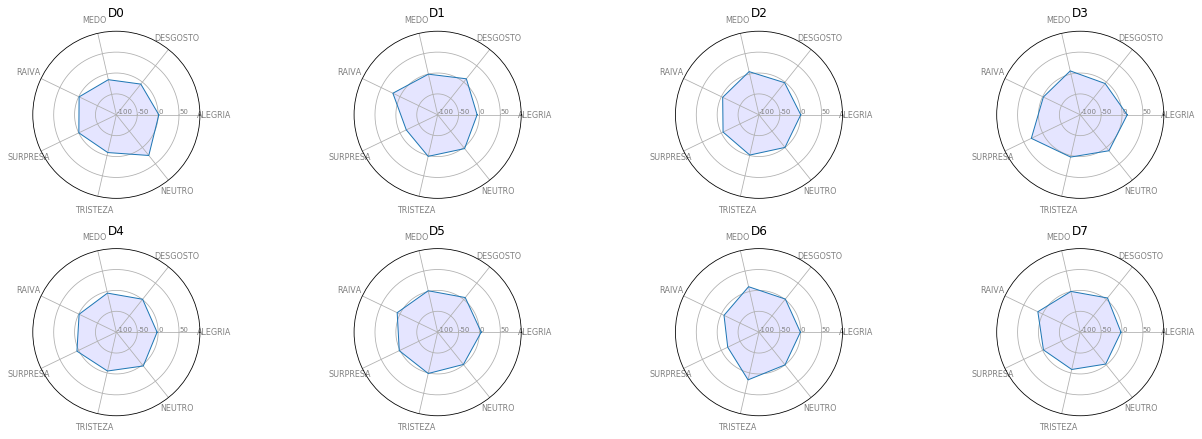

In [6]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

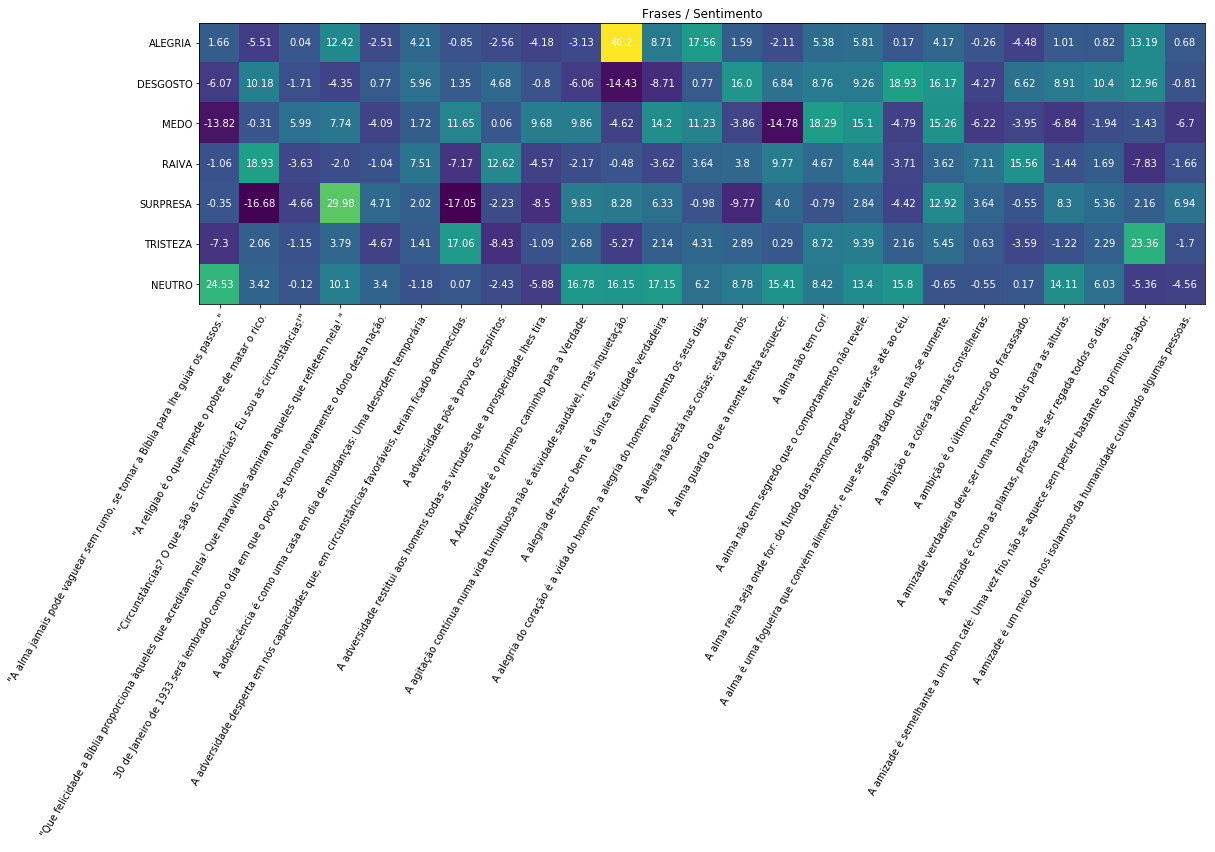

In [7]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [8]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA      1.66
DESGOSTO    -6.07
MEDO       -13.82
RAIVA       -1.06
SURPRESA    -0.35
TRISTEZA    -7.30
NEUTRO      24.53
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     -5.51
DESGOSTO    10.18
MEDO        -0.31
RAIVA       18.93
SURPRESA   -16.68
TRISTEZA     2.06
NEUTRO       3.42
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA     0.04
DESGOSTO   -1.71
MEDO        5.99
RAIVA      -3.63
SURPRESA   -4.66
TRISTEZA   -1.15
NEUTRO     -0.12
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     12.42
DESGOSTO    -4.35
MEDO         7.74
RAIVA       -2.00
SURPRESA    29.98
TRISTEZA     3.79
NEUTRO      1

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [11]:
# emotion_words_n['NEUTRO'] += emotion_words['ALEGRIA']
emotion_words_n['NEUTRO'] = emotion_words['NEUTRO']
emotion_words_n['NEUTRO'] = emotion_words['NEUTRO']
emotion_words_n['NEUTRO'] = emotion_words['NEUTRO']
emotion_words_n['NEUTRO'] = emotion_words['NEUTRO']
emotion_words_n['NEUTRO'] = emotion_words['NEUTRO']

5642


In [9]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words_n)
    
size = len(original_phrases)
df = pd.DataFrame(predicted[:size], index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4924
--- 0.06229877471923828 seconds ---
Calculating SVD...
--- 28.901899576187134 seconds ---
Processing emotional state... this may take a while...
--- 0.009865283966064453 seconds ---
Generating emotional state from lexicon...
--- 170.58052468299866 seconds ---
Calculating final emotional matrix...
--- 1.4915771484375 seconds ---


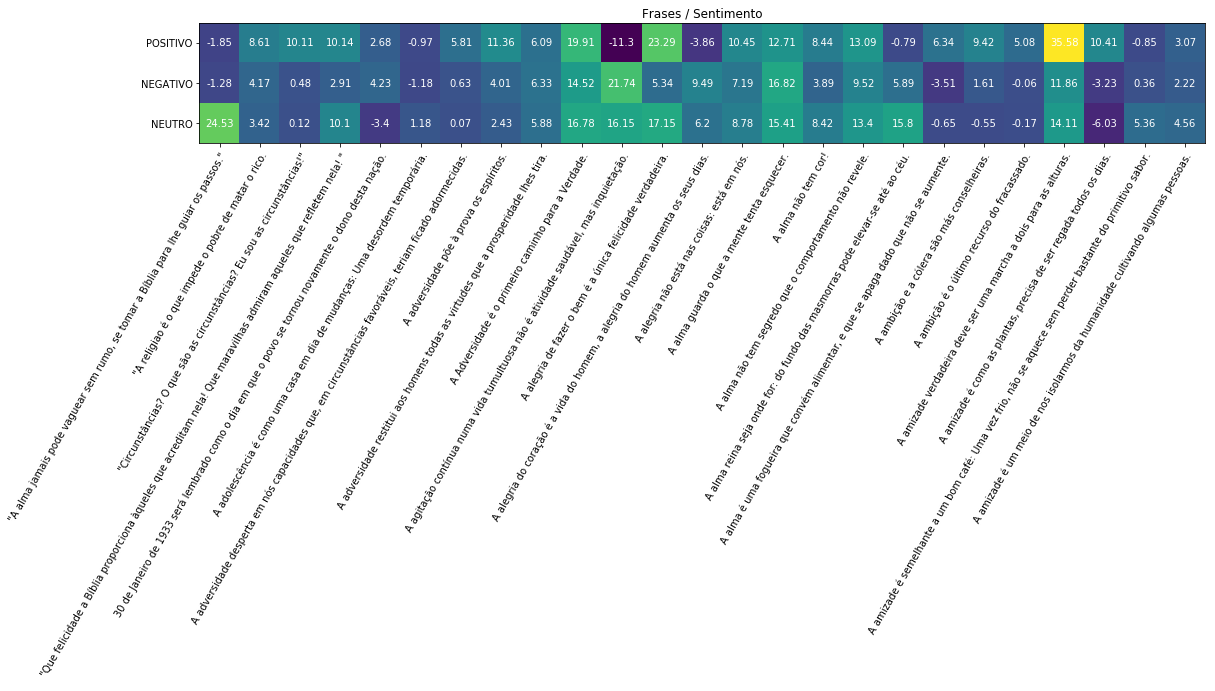

In [10]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

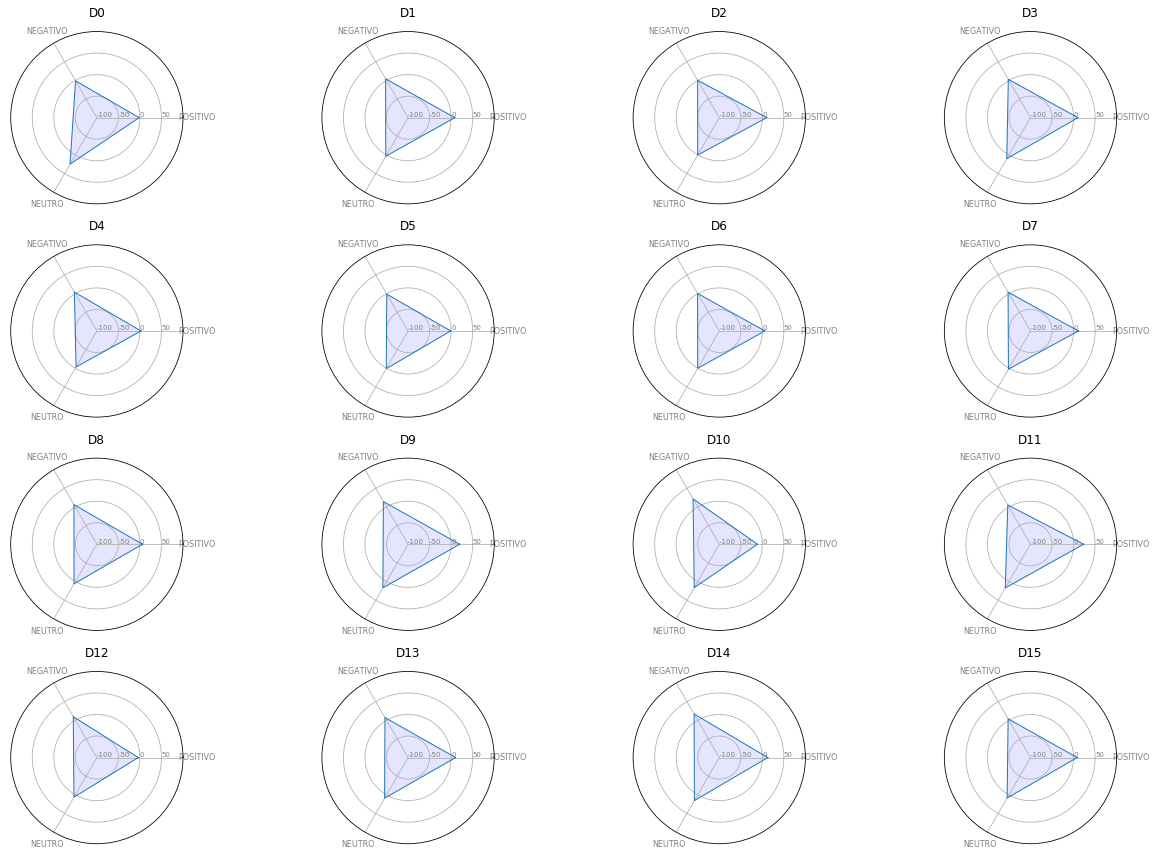

In [11]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [12]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO    -1.85
NEGATIVO    -1.28
NEUTRO      24.53
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    8.61
NEGATIVO    4.17
NEUTRO      3.42
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    10.11
NEGATIVO     0.48
NEUTRO       0.12
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    10.14
NEGATIVO     2.91
NEUTRO      10.10
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO    2.68
NEGATIVO    4.23
NEUTRO     -3.40
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como um

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Categorizaremos em POSITIVO, NEGATIVO e NEUTRO.

In [14]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    tweets = h.readlines()
    for tweet in tweets:
        rep = ['\n', '"', '@']
        for r in rep:
            tweet = tweet.replace(r, '')
        infos = tweet.split('|')
        # print(infos)
        original_tweets += [infos[1].strip()]
        sents += [infos[2].strip()]

tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(original_tweets))]
size = len(original_tweets)

In [ ]:
print('Loading emotional words: ')
emotion_words = load_valence_emotions(
    '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt', 
    '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/SentiLex-PT02/SentiLex-flex-PT02.txt'
)

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words)

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 28491
--- 0.6828289031982422 seconds ---
Calculating SVD...
--- 127.49897193908691 seconds ---
Processing emotional state... this may take a while...
--- 1.4621200561523438 seconds ---
Generating emotional state from lexicon...


Process ForkProcess-23:
Process ForkProcess-22:
Process ForkProcess-21:
Process ForkProcess-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/process.py", line 99, in run
  

concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/queues.py", line 236, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
OverflowError: cannot serialize a bytes object larger than 4 GiB
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/src/ai/unsupervised/emotional_lsa.py", line 21, in _calculate_emotional_state
    return np.asarray(list(wv)).T
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/concurrent/futures/process.py", line 476, in _chain_from_iterable_of_lists
    for element in iterable:
  File "/home/rdenadai/.pyenv/versions/3.7.0/lib/python3.7/concurrent/futures/_base.py", line 58

In [ ]:
df = pd.DataFrame(predicted[:size], index=ltweets, columns=emotion_words.keys())

### Acurácia

In [ ]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(original_tweets[:25]):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = (accuracy / len(original_tweets)) * 100
print(f'Accuracy: {accuracy}')

In [ ]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [ ]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])